# Kaggle Competition: House Prices: Advanced Regression Techniques

Competition Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

## 1) Business Understanding

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 2) Data Understanding

### 2.1 Import Libraries

In [157]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as pylab
#configure visualizations
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# # Modelling Helpers
# from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV

### 2.2 Load Data

In [95]:
train = pd.read_csv('train.csv')

In [96]:
train, test = train_test_split(train, train_size = 0.7)
trainM = train

### 2.3.1 Statistical Summaries

In [97]:
train.shape

(1021, 81)

In [98]:
test.shape

(439, 81)

In [99]:
print(train.columns.values)
# Classes?

#train.info()

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [100]:
# preview the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1014,1015,20,RL,60.0,11664,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,6,5,1948,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,206.0,TA,TA,CBlock,TA,Fa,No,BLQ,336,Unf,0,746,1082,GasA,TA,Y,SBrkr,1082,0,0,1082,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,130,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,119200
770,771,85,RL,NaN,7252,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,5,5,1982,1982,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,685,Unf,0,173,858,GasA,TA,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1983.0,Unf,2,576,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,134900
665,666,60,RL,106.0,11194,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1406,1406,GasA,Ex,Y,SBrkr,1454,482,0,1936,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,RFn,2,504,TA,TA,Y,188,124,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,230500
979,980,20,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1963,1963,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,651,Unf,0,470,1121,GasA,TA,Y,SBrkr,1121,0,0,1121,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1963.0,Unf,2,480,TA,TA,Y,0,80,0,0,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,139000


In [101]:
pd.options.display.max_columns=100
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1923,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,440,440,GasA,TA,Y,FuseA,869,0,0,869,0,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
153,154,20,RL,NaN,13500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,7,1960,1975,Flat,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,429,ALQ,1080,93,1602,GasA,Gd,Y,SBrkr,1252,0,0,1252,1,0,1,0,1,1,TA,4,Typ,1,Gd,Attchd,1960.0,RFn,2,564,TA,TA,Y,409,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,235000
980,981,85,RL,NaN,12122,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,7,9,1961,2007,Gable,CompShg,CemntBd,CmentBd,Stone,210.0,Ex,TA,CBlock,TA,TA,Av,ALQ,867,Unf,0,77,944,GasA,Gd,Y,SBrkr,999,0,0,999,1,0,1,0,3,1,Ex,6,Typ,0,NaN,Attchd,1961.0,RFn,2,588,TA,TA,Y,144,76,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,178400
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,97.0,TA,TA,CBlock,TA,TA,Av,LwQ,328,ALQ,551,285,1164,GasA,Ex,Y,SBrkr,1320,0,0,1320,1,0,1,0,3,1,TA,6,Typ,2,Fa,Attchd,1966.0,RFn,2,564,TA,TA,Y,160,68,240,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000


In [102]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1021.000000,1021.000000,849.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1014.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,962.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,712.191969,55.396670,69.725559,10618.066601,6.08619,5.593536,1970.418217,1983.945152,99.909270,441.662096,47.230167,566.233105,1055.125367,1162.507346,337.567091,5.019589,1505.094025,0.423115,0.057786,1.556317,0.372184,2.871694,1.042116,6.513222,0.613124,1977.959459,1.755142,471.433888,90.914789,45.449559,23.814887,4.122429,13.906954,2.752204,41.841332,6.286974,2007.860921,180749.848188
std,419.387556,41.244303,22.555358,10182.070526,1.36856,1.109812,29.989711,21.033375,170.890333,438.748046,157.255259,430.320891,427.141070,379.528623,431.239380,44.408792,512.176941,0.513747,0.237616,0.547733,0.499578,0.800852,0.210483,1.590126,0.646396,24.844017,0.761053,217.370662,120.198649,65.019670,64.520889,32.723915,53.672355,39.400860,514.230758,2.667325,1.313673,81585.671529
min,1.000000,20.000000,21.000000,1477.000000,2.00000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,345.000000,20.000000,60.000000,7728.000000,5.00000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,238.000000,792.000000,874.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,128000.000000
50%,700.000000,50.000000,68.000000,9505.000000,6.00000,5.000000,1971.000000,1992.000000,0.000000,383.000000,0.000000,484.000000,991.000000,1091.000000,0.000000,0.000000,1458.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,1068.000000,70.000000,80.000000,11700.000000,7.00000,6.000000,2000.000000,2004.000000,166.000000,716.000000,0.000000,798.000000,1296.000000,1392.000000,725.000000,0.000000,1761.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,577.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,182.000000,215245.000000,10.00000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,528.000000,4676.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1356.000000,736.000000,523.000000,552.000000,508.000000,440.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.3.2 Visualizations

#### Look at outcome variable (SalePrice)

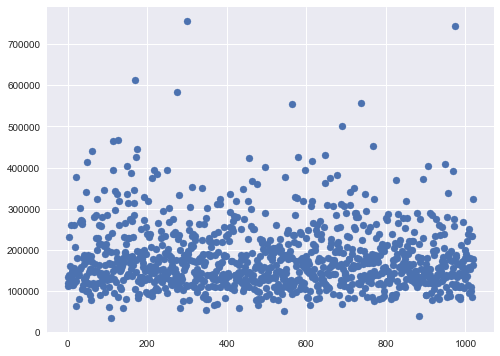

In [103]:
plt.scatter(range(0,len(train['SalePrice'])),train['SalePrice'])

(array([ 110.,  507.,  243.,  100.,   37.,   17.,    1.,    3.,    1.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

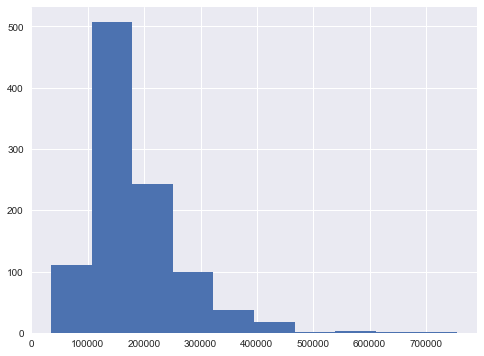

In [104]:
plt.hist(train['SalePrice'])

(array([   2.,    7.,   42.,  142.,  324.,  267.,  155.,   63.,   14.,    5.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

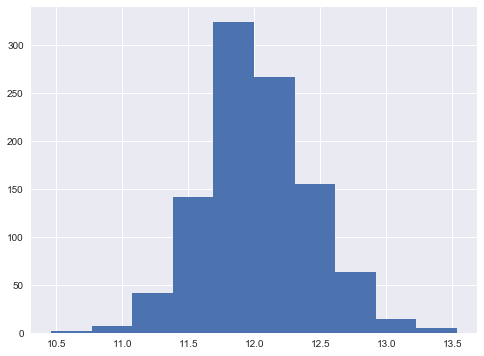

In [105]:
sale_price_norm = np.log(train['SalePrice'])
plt.hist(sale_price_norm)

34900


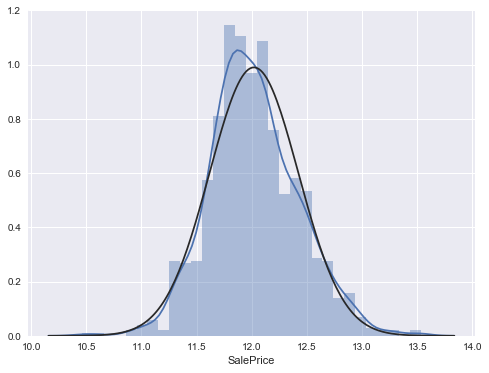

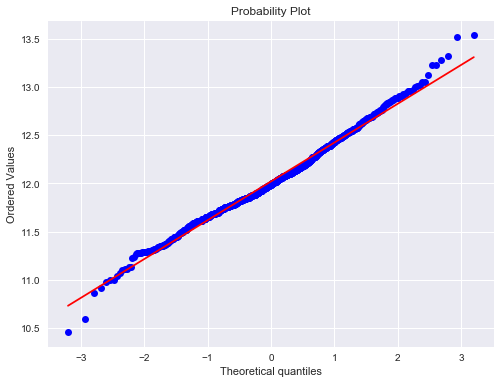

In [106]:
print(min(train['SalePrice']))

#sale_price_norm = np.log1p(train['SalePrice'])
#plt.hist(sale_price_norm)

from scipy.stats import norm
#applying log transformation
#train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(np.log(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

Based on this, we should probably transform our Sale Price distribution before modeling to normalize.

#### Look at Missing Values

In [107]:
#Then we shall be getting the percentage of the missing values in columns of our dataset like below
percentage_missing = train.isnull().sum()/len(train)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)


#    # Handle remaining missing values for numerical features by using median as replacement
#    print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
#    train_num = train_num.fillna(train_num.median())
#    print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

Electrical      0.000979
MasVnrType      0.006856
MasVnrArea      0.006856
BsmtQual        0.025465
BsmtCond        0.025465
BsmtExposure    0.025465
BsmtFinType1    0.025465
BsmtFinType2    0.026445
GarageCond      0.057786
GarageQual      0.057786
GarageFinish    0.057786
GarageType      0.057786
GarageYrBlt     0.057786
LotFrontage     0.168462
FireplaceQu     0.473066
Fence           0.806072
Alley           0.936337
MiscFeature     0.962782
PoolQC          0.995103
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

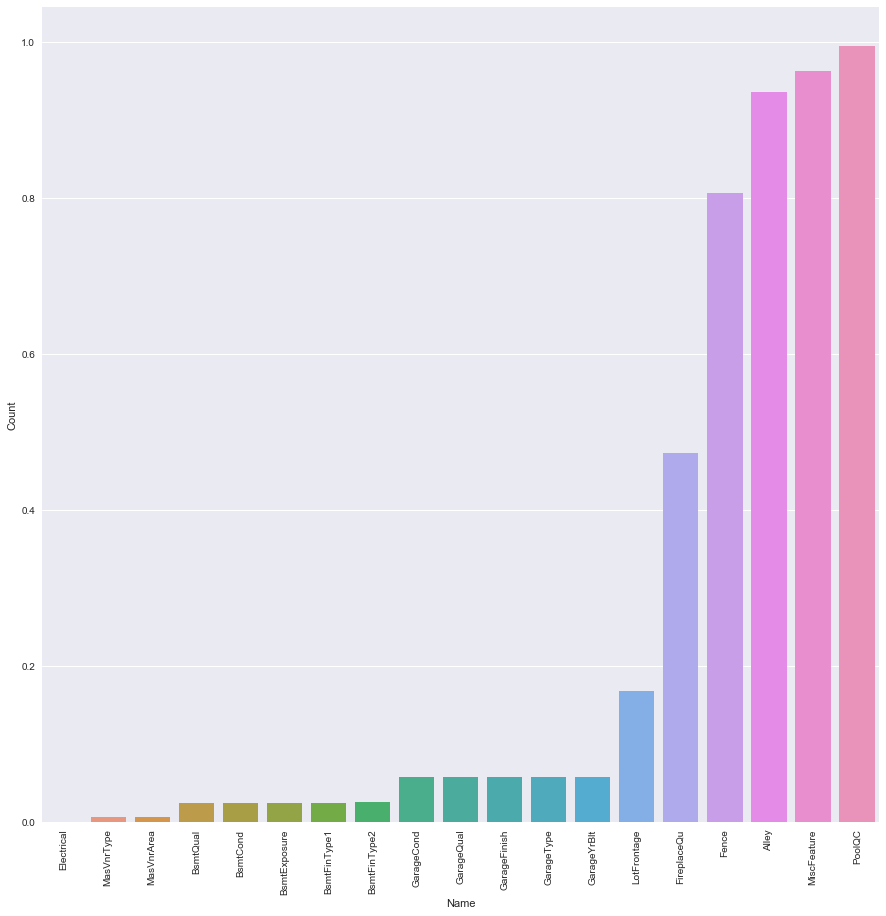

In [108]:
#lets plot to visualize the missing values
percentage_missing = percentage_missing.to_frame()
percentage_missing.columns=['Count']
percentage_missing.index.names = ['Name']
percentage_missing['Name'] = percentage_missing.index
plt.figure(figsize=(15,15))
sns.barplot(x="Name",y="Count",data=percentage_missing)
plt.xticks(rotation=90)

#missing = train.isnull().sum()
#missing = missing[missing > 0]
#missing.sort_values(inplace=True)
#missing.plot.bar()

In [109]:
# Look at the variables with high numbers of missings
for i in list(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

        SalePrice
PoolQC           
Ex         490000
Fa         215500
Gd         171000
             SalePrice
MiscFeature           
Gar2            151500
Shed            146000
TenC            250000
       SalePrice
Alley           
Grvl      117000
Pave      168300
       SalePrice
Fence           
GdPrv     170500
GdWo      138750
MnPrv     137500
MnWw      124900
             SalePrice
FireplaceQu           
Ex              373125
Fa              158000
Gd              201800
Po              139000
TA              185000


We can probably assume that the missings for PoolQC, Alley, Fence, and FireplaceQu correspond with those features being absent in a house.

### 2.3.3 Numeric Data

In [110]:
numVars = list(train.describe().columns)
print(numVars)
#quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
#quantitative.remove('SalePrice')
#quantitative.remove('Id')
#OR
#numerical_data = train.select_dtypes(include=[np.number])
#categorical_data = train.select_dtypes(exclude=[np.number])
#len(quantitative)
print(len(numVars))
numVars.remove('SalePrice')
numVars.remove('Id')
print(len(numVars))
numData = train[numVars]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38
36


In [111]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print(qualitative)
print(len(qualitative))
catData = train[qualitative]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


Initial efforts will focus on examining what factors may contribute to graduation rates. Graduate rates help determine whether schools are designated as Title I schools, and thus receive significant funding for special programs to aid students and teachers. 

#### Comparing features to Sale Price

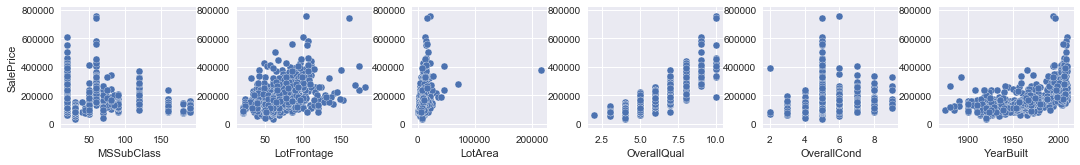

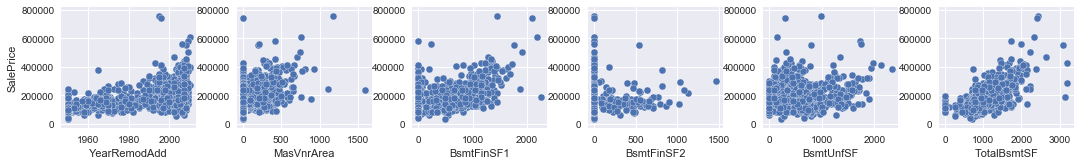

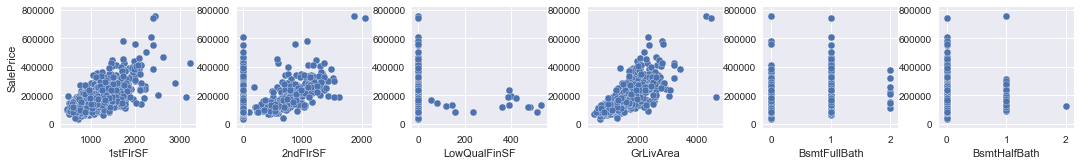

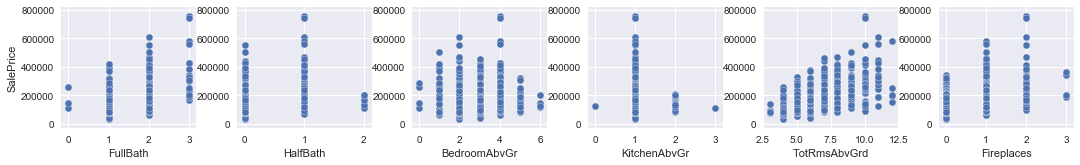

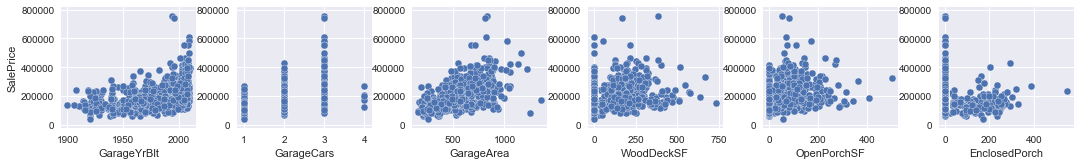

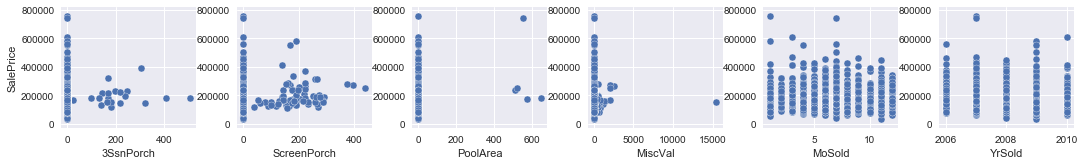

In [112]:
sns.pairplot(train[numVars[0:6] + list(["SalePrice"])].dropna(), x_vars=numVars[0:6], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[6:12] + list(["SalePrice"])].dropna(), x_vars=numVars[6:12], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[12:18] + list(["SalePrice"])].dropna(), x_vars=numVars[12:18], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[18:24] + list(["SalePrice"])].dropna(), x_vars=numVars[18:24], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[24:30] + list(["SalePrice"])].dropna(), x_vars=numVars[24:30], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[30:36] + list(["SalePrice"])].dropna(), x_vars=numVars[30:36], y_vars='SalePrice', size=2.5, diag_kind="kde")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.407935,-0.176300,0.029963,-0.043273,0.035977,0.056848,-0.008420,-0.082612,-0.061270,-0.147539,-0.256051,-0.253953,0.301397,0.033616,0.068501,0.005489,-0.011845,0.140812,0.164833,-0.027249,0.279841,0.040543,-0.057857,0.087038,-0.020015,-0.073256,-0.024905,0.011142,-0.008724,-0.046652,-0.031563,0.003750,-0.041041,0.008366,-0.006761,-0.085017
LotFrontage,-0.407935,1.000000,0.384457,0.293867,-0.114083,0.171486,0.103232,0.234314,0.179322,0.055019,0.156833,0.362768,0.425133,0.115925,0.042386,0.409722,0.072685,0.017287,0.230204,0.095951,0.282896,-0.017366,0.369975,0.281613,0.105873,0.351380,0.371970,0.098266,0.153869,0.031372,0.095081,0.042336,0.142595,0.020121,0.013198,0.029375,0.413977
LotArea,-0.176300,0.384457,1.000000,0.099629,-0.021950,0.015149,0.022547,0.107021,0.177978,0.105456,0.007285,0.228978,0.269235,0.044183,-0.000975,0.236623,0.125123,0.074473,0.122623,0.012683,0.120964,-0.017870,0.171380,0.266909,-0.024793,0.150350,0.159854,0.099446,0.085645,-0.015705,0.012631,0.036153,0.031215,0.023033,-0.010783,-0.010547,0.252773
OverallQual,0.029963,0.293867,0.099629,1.000000,-0.109882,0.580987,0.544489,0.428107,0.273739,-0.077954,0.294152,0.548820,0.489244,0.301944,-0.056342,0.611878,0.130747,-0.045479,0.566369,0.285710,0.110285,-0.175979,0.454491,0.389045,0.533517,0.601997,0.556937,0.241127,0.328454,-0.105674,0.029164,0.065977,0.064014,-0.008556,0.054989,-0.051129,0.801496
OverallCond,-0.043273,-0.114083,-0.021950,-0.109882,1.000000,-0.375993,0.056583,-0.109297,-0.053038,0.070458,-0.162896,-0.192649,-0.173530,0.041894,-0.014956,-0.094610,-0.035091,0.092873,-0.176002,-0.046936,0.003037,-0.077736,-0.063339,-0.013056,-0.301379,-0.195720,-0.161672,0.012263,-0.028442,0.072964,-0.000437,0.013634,-0.021430,0.093855,-0.019178,0.037175,-0.094177
YearBuilt,0.035977,0.171486,0.015149,0.580987,-0.375993,1.000000,0.590889,0.315123,0.270229,-0.064103,0.159340,0.414498,0.302906,0.031115,-0.162288,0.236583,0.182328,-0.053198,0.488601,0.244216,-0.028583,-0.136829,0.145121,0.126294,0.815841,0.542888,0.480760,0.221674,0.221784,-0.396918,0.043272,-0.011001,-0.002152,-0.029147,0.005386,-0.028310,0.543259
YearRemodAdd,0.056848,0.103232,0.022547,0.544489,0.056583,0.590889,1.000000,0.188398,0.150557,-0.081923,0.167052,0.292783,0.242650,0.164781,-0.055745,0.313714,0.129532,-0.056645,0.474012,0.196478,0.003772,-0.100680,0.233851,0.110280,0.656050,0.432903,0.378800,0.229236,0.265524,-0.179586,0.051363,-0.017679,0.014740,0.016253,0.017249,0.034212,0.514889
MasVnrArea,-0.008420,0.234314,0.107021,0.428107,-0.109297,0.315123,0.188398,1.000000,0.299825,-0.065405,0.099066,0.383774,0.386840,0.149020,-0.066379,0.404404,0.105985,0.042609,0.288031,0.197370,0.135436,-0.032201,0.318955,0.252782,0.248632,0.364257,0.373344,0.171131,0.160482,-0.122208,0.029031,0.101039,-0.017693,-0.020921,-0.042984,-0.020480,0.486540
BsmtFinSF1,-0.082612,0.179322,0.177978,0.273739,-0.053038,0.270229,0.150557,0.299825,1.000000,-0.043756,-0.482188,0.525287,0.456851,-0.151639,-0.048529,0.206648,0.638096,0.059047,0.079984,0.015268,-0.116630,-0.060071,0.065969,0.228281,0.174227,0.247591,0.298100,0.187589,0.108576,-0.109838,0.024765,0.074231,0.090340,0.013770,-0.028966,0.009724,0.445606
BsmtFinSF2,-0.061270,0.055019,0.105456,-0.077954,0.070458,-0.064103,-0.081923,-0.065405,-0.043756,1.000000,-0.235267,0.086194,0.065052,-0.092069,0.014032,-0.028099,0.169875,0.075076,-0.104155,-0.030331,0.001776,-0.035244,-0.043902,0.038627,-0.102179,-0.064072,-0.031575,0.096893,-0.048762,0.056491,-0.036913,0.042870,0.071077,-0.004251,-0.000964,0.048975,-0.022697


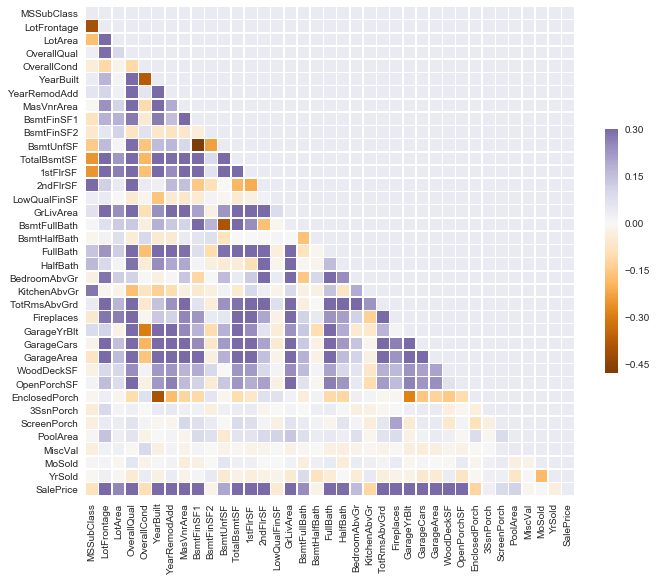

In [113]:
# Compute the correlation matrix
corr = train[numVars+list(["SalePrice"])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

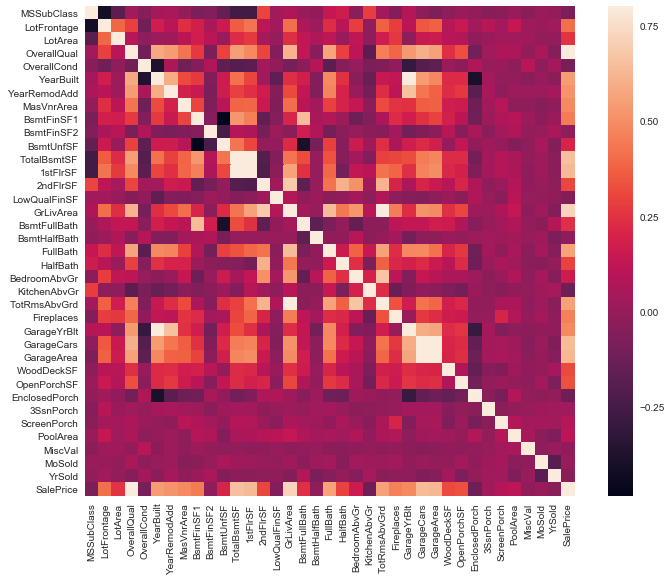

In [114]:
#correlation matrix
corrmat = train[numVars+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

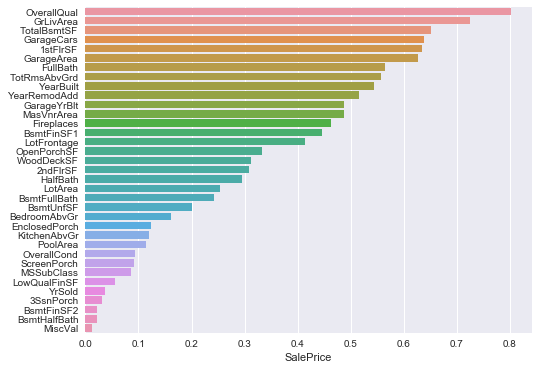

In [115]:
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:36])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

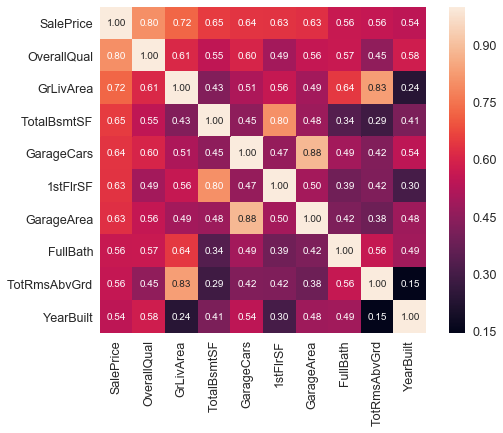

In [116]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual     0.801496
GrLivArea       0.724470
TotalBsmtSF     0.652286
GarageCars      0.637492
1stFlrSF        0.634683
GarageArea      0.626252
FullBath        0.564135
TotRmsAbvGrd    0.556376
YearBuilt       0.543259
Name: SalePrice, dtype: float64


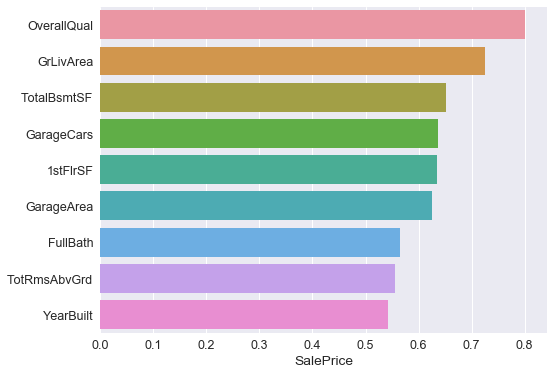

In [117]:
print(abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

In [119]:
corr2 = train[numTop10.index].corr()
#for i in range(1,len(numTop10)+1):
#        print (abs(cm[numTop10.index[i]]).sort_values(ascending=False)[1])

print(corr2>0.65)

for i in range(0,len(corr2)):
    print (corr2[numTop10.index[i]]).sort_values(ascending=False)[1]

              OverallQual  GrLivArea  TotalBsmtSF  GarageCars  1stFlrSF  \
OverallQual          True      False        False       False     False   
GrLivArea           False       True        False       False     False   
TotalBsmtSF         False      False         True       False      True   
GarageCars          False      False        False        True     False   
1stFlrSF            False      False         True       False      True   
GarageArea          False      False        False        True     False   
FullBath            False      False        False       False     False   
TotRmsAbvGrd        False       True        False       False     False   
YearBuilt           False      False        False       False     False   

              GarageArea  FullBath  TotRmsAbvGrd  YearBuilt  
OverallQual        False     False         False      False  
GrLivArea          False     False          True      False  
TotalBsmtSF        False     False         False      False  
G

OverallQual: top variables (include)

GrLivArea: Correlated with FullBath (0.64) and TotRmsAbvGrd (0.83); remove TotRmsAbvGrd

TotalBsmtSF: correlated with 1stFlrSF (0.79); remove 1stFlrSF

GarageCars: correlated with GarageArea (0.89); remove GarageArea

FullBath: max corr = 0.64

YearBuilt: max corr = 0.57

In [120]:
numSelect = list(numTop10.index)
numSelect.remove('TotRmsAbvGrd')
numSelect.remove('1stFlrSF')
numSelect.remove('GarageArea')

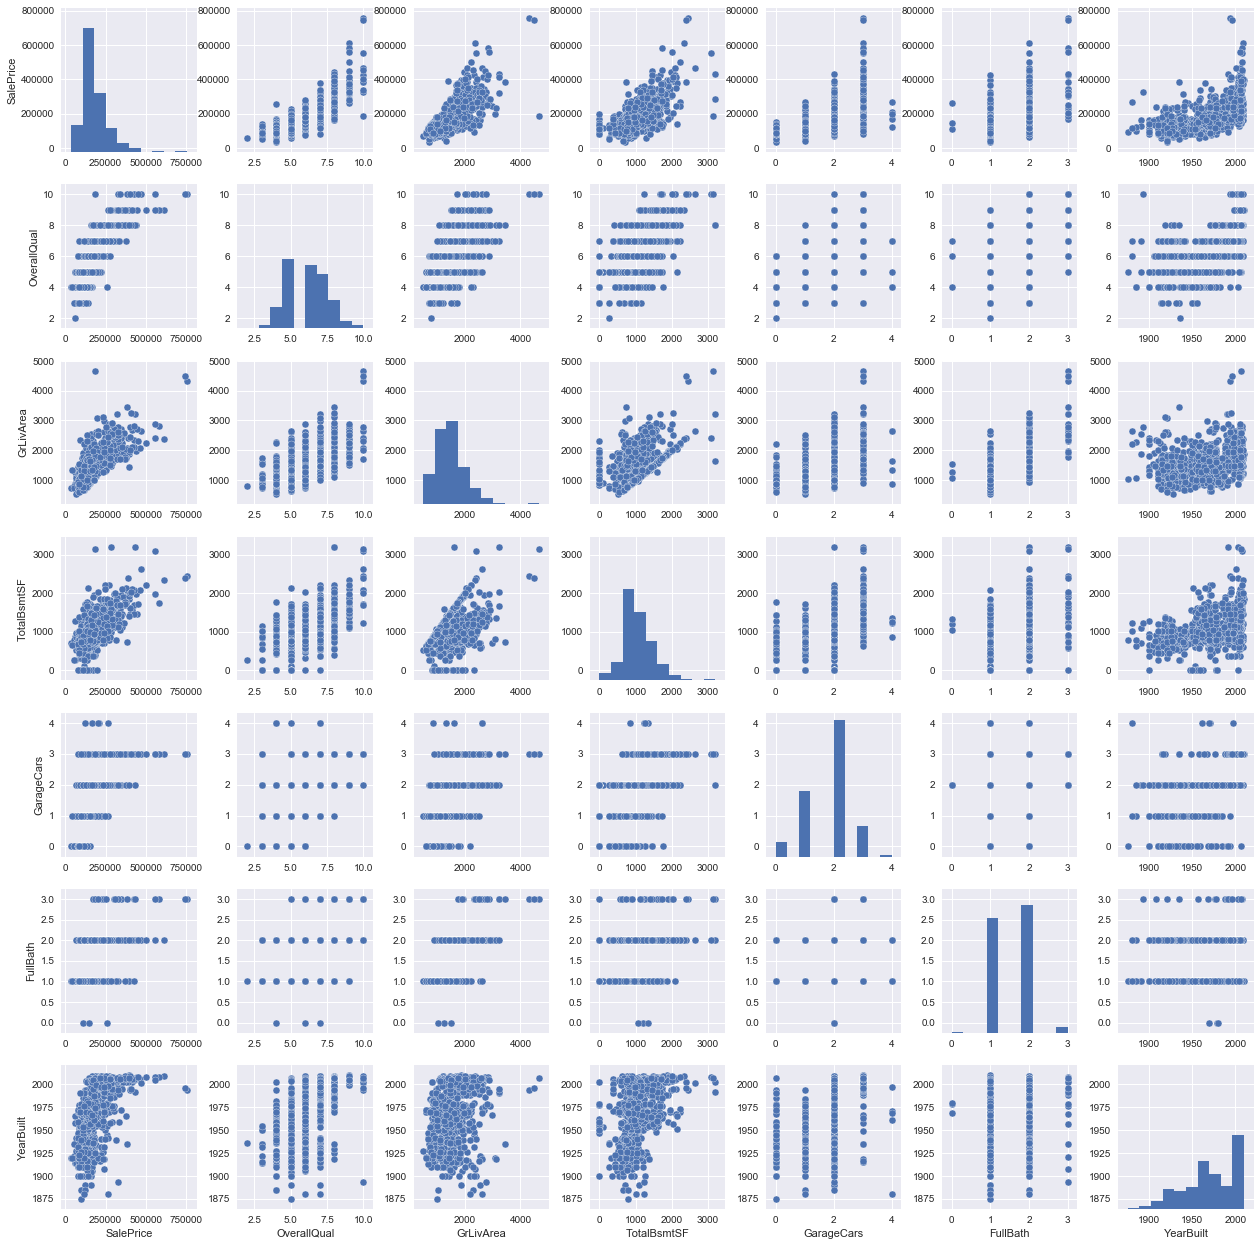

In [121]:
#scatterplot
sns.set()
#numVars_sub = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt']
#sns.pairplot(train[numVars_sub], size = 2.5)
sns.pairplot(train[list(['SalePrice'])+numSelect], size = 2.5)
plt.show();

### 2.3.4 Categorical Data

In [122]:
catData.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1021,1021,65,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1014,1021,1021,1021,995,995,995,995,994,1021,1021,1021,1020,1021,1021,538,962,962,962,962,1021,5,198,38,1021,1021
unique,5,2,2,4,4,2,5,3,25,9,6,5,8,6,5,13,15,4,4,4,6,4,4,4,6,6,5,5,2,5,4,6,5,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,812,1017,35,660,925,1020,735,974,172,879,1011,866,511,800,1005,346,341,611,645,899,452,479,912,675,299,871,999,519,955,930,520,956,283,600,430,918,926,933,2,105,36,877,839


In [123]:
for c in list(catData.columns.values):
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

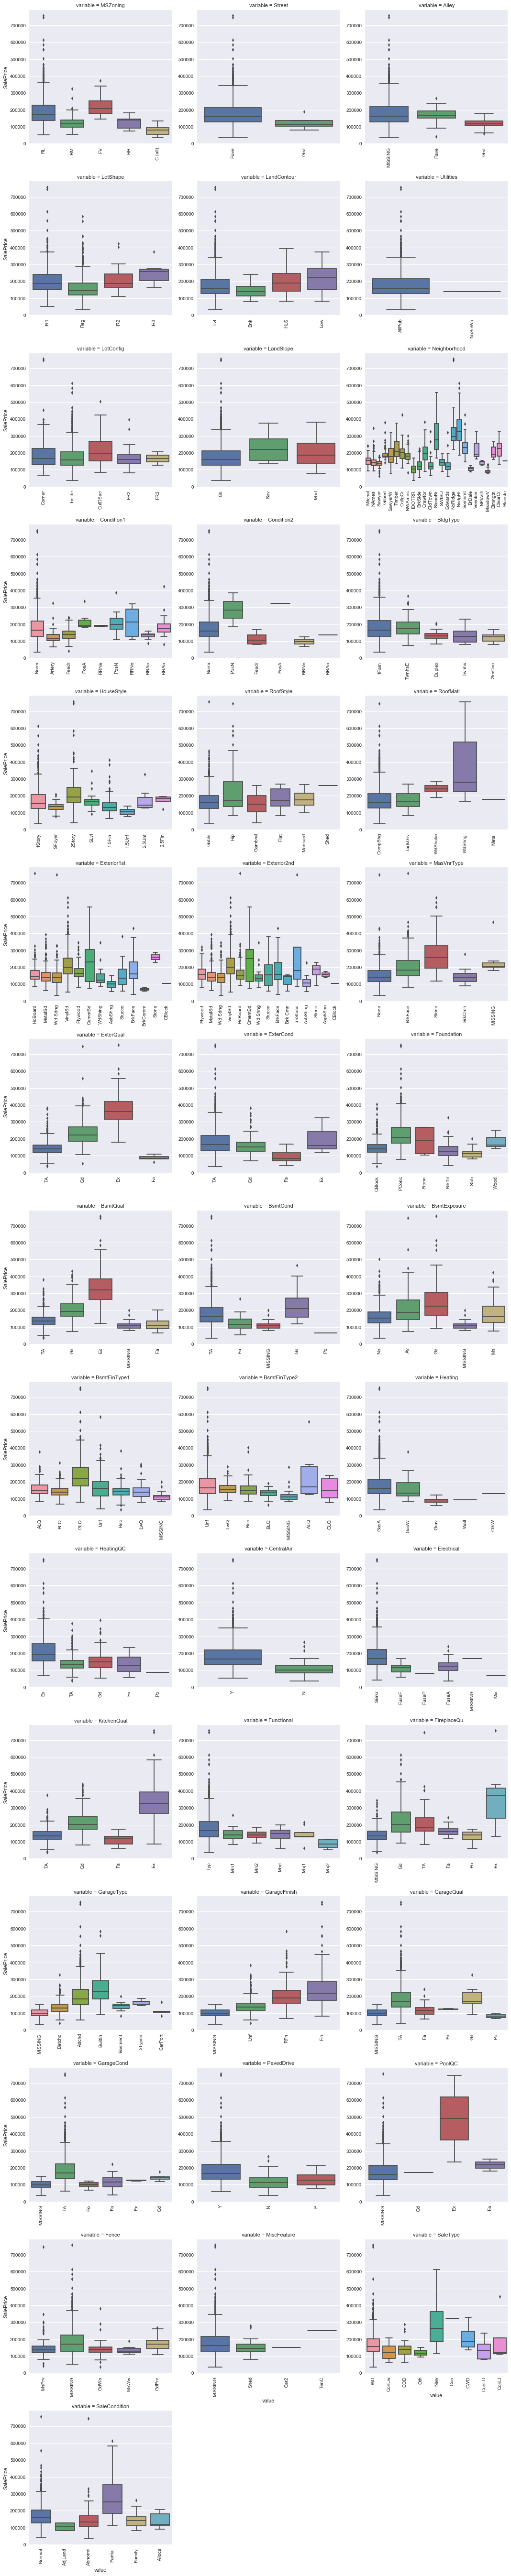

In [124]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(catData.columns.values))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Important-looking variables:

Plot variable importance (ANOVA)

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

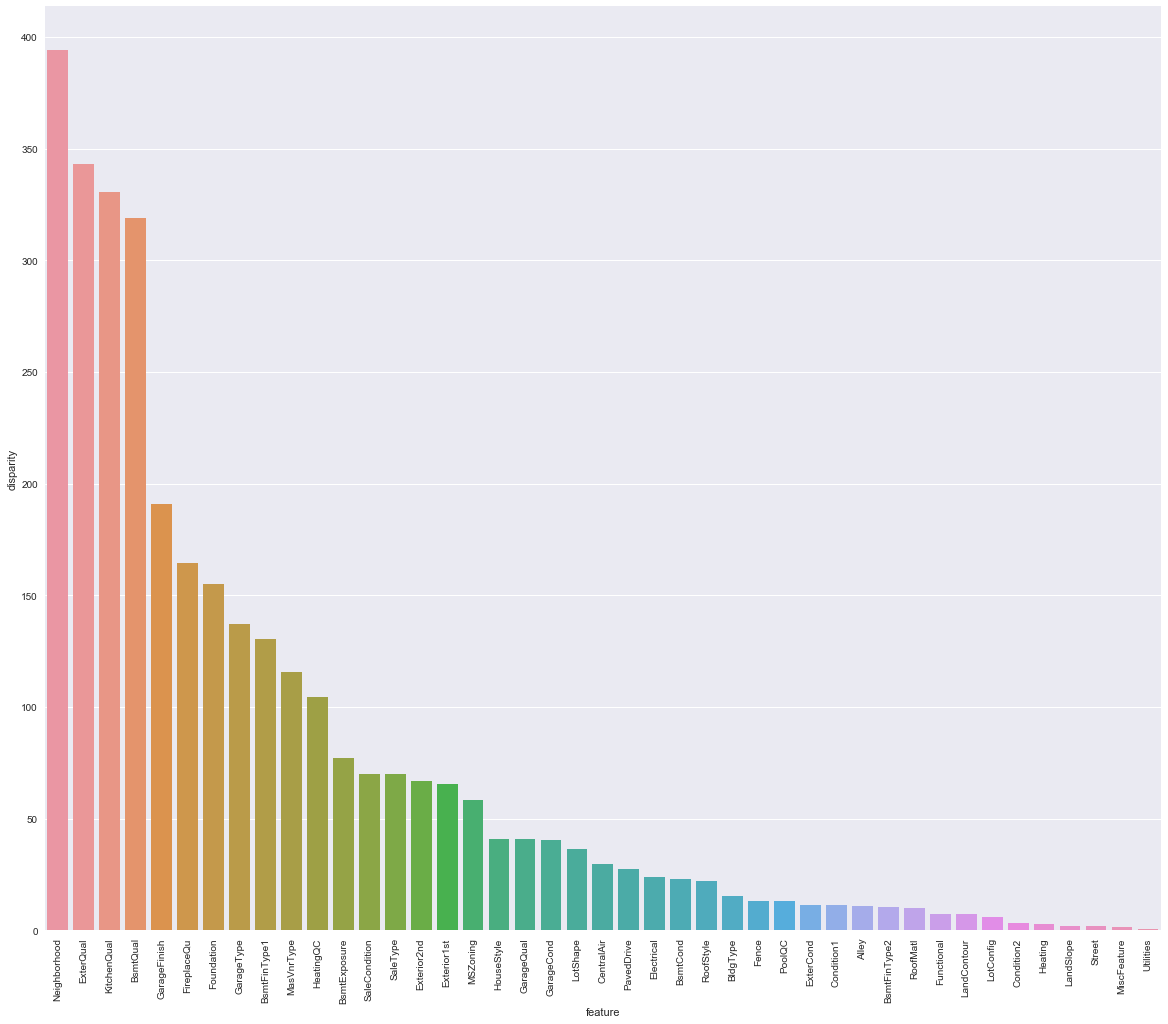

In [125]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = list(catData.columns.values)
    pvals = []
    for c in list(catData.columns.values):
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots(figsize=(20,17))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [126]:
a_sub = a[a['disparity']>90]
print(a_sub)

         feature           pval   disparity
8   Neighborhood  7.767187e-172  393.994728
18     ExterQual  9.203314e-150  343.168200
30   KitchenQual  3.370069e-144  330.357320
21      BsmtQual  2.996555e-139  318.961865
34  GarageFinish   1.199005e-83  190.933071
32   FireplaceQu   4.589064e-72  164.262451
20    Foundation   5.004346e-68  154.965479
33    GarageType   2.538050e-60  137.223710
24  BsmtFinType1   1.986408e-57  130.561022
17    MasVnrType   6.968808e-51  115.490396
27     HeatingQC   4.354963e-46  104.447598


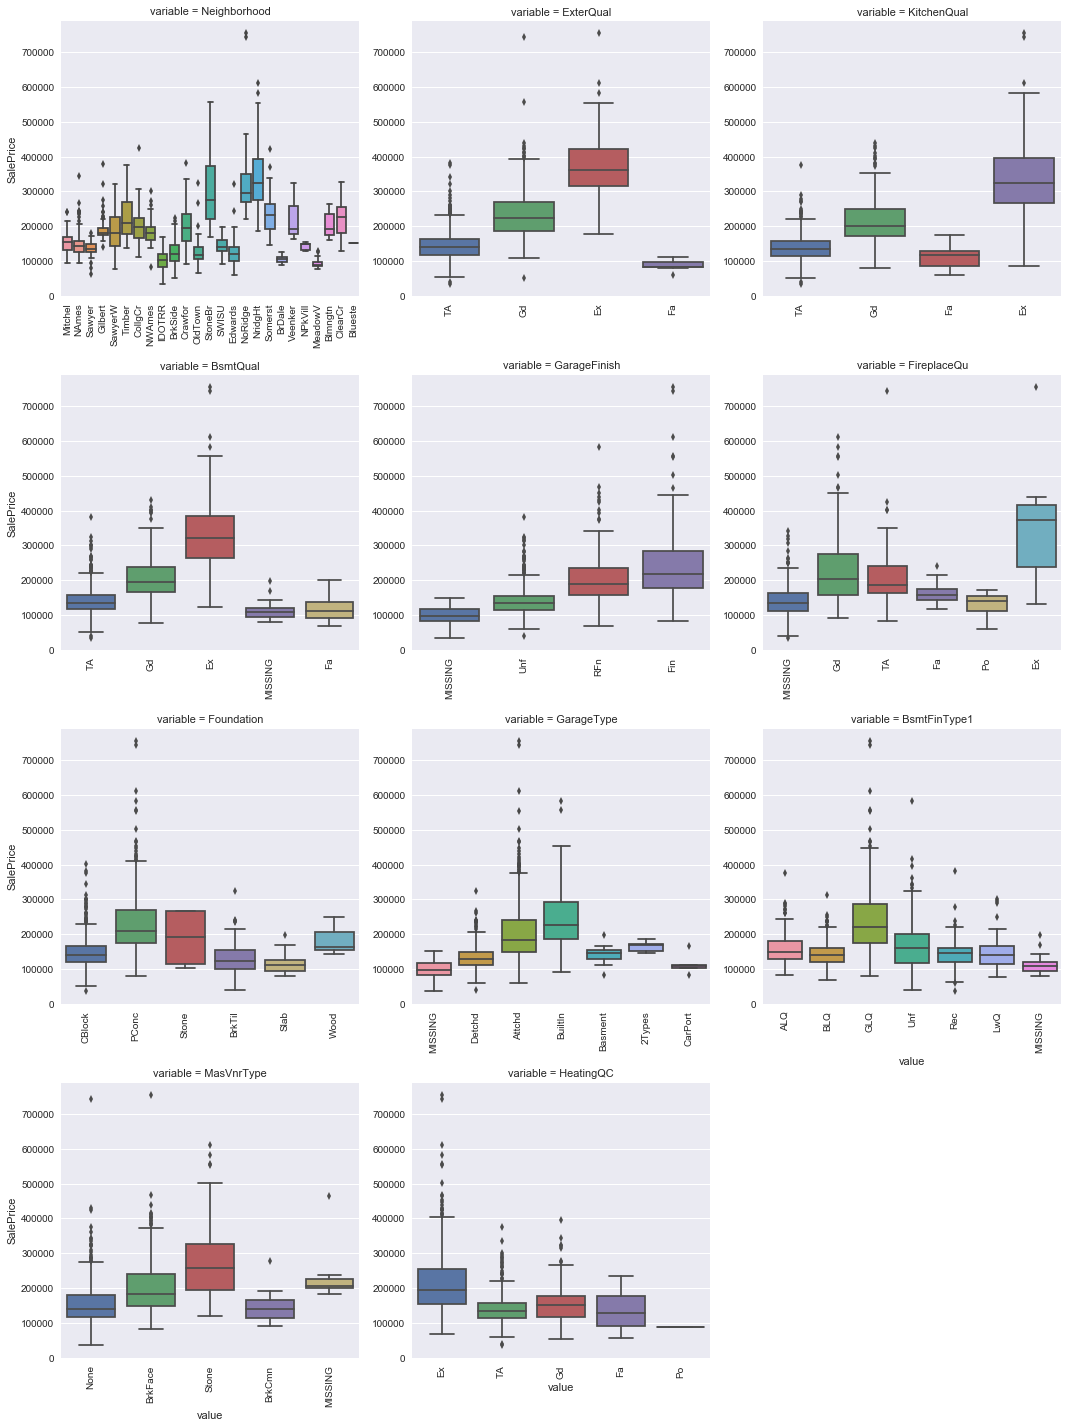

In [127]:
cat_sub = train[list(a_sub['feature'])+list(['SalePrice'])]
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cat_sub, id_vars=['SalePrice'], value_vars=list(a_sub['feature']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [128]:
quality_vars = list(['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC'])
for i in quality_vars:
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

           SalePrice
ExterQual           
Ex            361919
Fa             83750
Gd            222500
TA            139000
             SalePrice
KitchenQual           
Ex              325000
Fa              116000
Gd              201000
TA              135000
          SalePrice
BsmtQual           
Ex         320000.0
Fa         110000.0
Gd         193939.5
TA         135500.0
MISSING    108750.0
             SalePrice
FireplaceQu           
Ex              373125
Fa              158000
Gd              201800
Po              139000
TA              185000
MISSING         134900
           SalePrice
HeatingQC           
Ex            194500
Fa            126750
Gd            150050
Po             87000
TA            133700


## 3) Data Preparation

Create a subset of the master data frame (train and test sets) with only the features of interest

In [129]:
featSelect = list(numSelect) + list(cat_sub)
print(featSelect)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'BsmtFinType1', 'MasVnrType', 'HeatingQC', 'SalePrice']


In [130]:
train = train[featSelect]
train.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,FireplaceQu,Foundation,GarageType,BsmtFinType1,MasVnrType,HeatingQC,SalePrice
1407,5,833,833,0,1,1985,Mitchel,TA,TA,TA,MISSING,MISSING,CBlock,MISSING,ALQ,None,Ex,112000
1014,6,1082,1082,1,1,1948,NAmes,TA,TA,TA,Unf,Gd,CBlock,Detchd,BLQ,BrkFace,TA,119200
770,5,858,858,2,1,1982,Sawyer,TA,TA,Gd,Unf,MISSING,CBlock,Detchd,GLQ,None,TA,134900
665,8,1936,1406,2,2,2000,Gilbert,Gd,Gd,Gd,RFn,TA,PConc,Attchd,Unf,BrkFace,Ex,230500
979,5,1121,1121,2,1,1963,Sawyer,TA,TA,TA,Unf,MISSING,PConc,Detchd,Rec,None,TA,139000


### 3.1 Categorical Features

Categorical Features of interest:

In [131]:
print(list(cat_sub.columns.values))

['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'BsmtFinType1', 'MasVnrType', 'HeatingQC', 'SalePrice']


### Creation of Ordinal Variables (Enumeration)

In [132]:
print(list(quality_vars))

['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC']


Replace all Na, NaN values with MISSING category for later processing

In [133]:
#for c in list(catData.columns.values):
for c in list(quality_vars):
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(5) Ex - Excellent

(4) Gd - Good

(3) TA - Average/Typical

(2) Fa - Fair

(1) Po - Poor

(NA) Missing

In [134]:
enumList = list()
for i in range(0,len(train)):
    if (train['ExterQual'].iloc[i]=='Ex'):
        enumList.append(5)
    if (train['ExterQual'].iloc[i]=='Gd'):
        enumList.append(4)
    if (train['ExterQual'].iloc[i]=='TA'):
        enumList.append(3)
    if (train['ExterQual'].iloc[i]=='Fa'):
        enumList.append(2)
    if (train['ExterQual'].iloc[i]=='Po'):
        enumList.append(1)
    if (train['ExterQual'].iloc[i]=='MISSING'):
        enumList.append(np.nan)
        
print(np.unique(enumList, return_counts=True))
print(np.unique(train['ExterQual'], return_counts=True))

#train['BsmtQual'][pd.isnull(train['BsmtQual'])]='MISSING'
#train['FireplaceQu'][pd.isnull(train['FireplaceQu'])]='MISSING'

for j in quality_vars:
    enumList = list()
    for i in range(0,len(train)):
        if (train[j].iloc[i]=='Ex'):
            enumList.append(5)
        if (train[j].iloc[i]=='Gd'):
            enumList.append(4)
        if (train[j].iloc[i]=='TA'):
            enumList.append(3)
        if (train[j].iloc[i]=='Fa'):
            enumList.append(2)
        if (train[j].iloc[i]=='Po'):
            enumList.append(1)
        if (train[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (train[j].iloc[i]=='nan'):
            enumList.append(0)
    train[j+'_E'] = enumList
    
    
#qual_dict={np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
#name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond',\
#                 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])
#for i in name:
#malldata.head()

(array([2, 3, 4, 5]), array([  8, 645, 329,  39], dtype=int64))
(array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object), array([ 39,   8, 329, 645], dtype=int64))


c:\python27\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [135]:
for j in list(['GarageFinish']):
    enumList = list()
    for i in range(0,len(train)):
        if (train[j].iloc[i]=='Fin'):
            enumList.append(3)
        if (train[j].iloc[i]=='RFn'):
            enumList.append(2)
        if (train[j].iloc[i]=='Unf'):
            enumList.append(1)
        if (train[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (train[j].iloc[i]=='nan'):
            enumList.append(0)
    train[j+'_E'] = enumList

c:\python27\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
train = train.drop(quality_vars, axis=1)
train = train.drop('GarageFinish', axis=1)

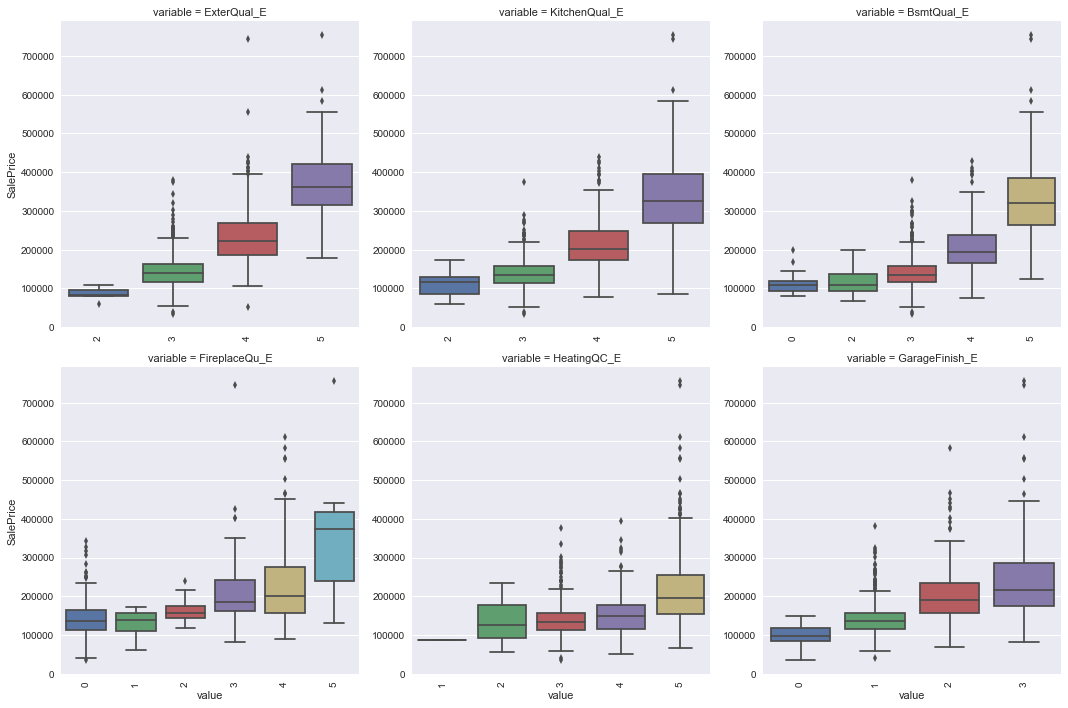

In [137]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [138]:
list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E'])+list(['SalePrice'])

['ExterQual_E',
 'KitchenQual_E',
 'BsmtQual_E',
 'FireplaceQu_E',
 'HeatingQC_E',
 'GarageFinish_E',
 'SalePrice']

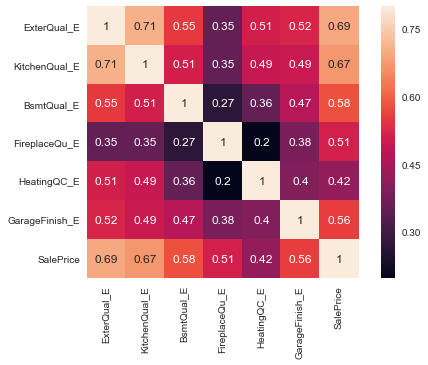

In [139]:
#correlation matrix
corrmat = train[list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E'])+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(8, 5))
hm = sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [140]:
#corr2 = train[numTop10.index].corr()
print(corrmat>0.6)

                ExterQual_E  KitchenQual_E  BsmtQual_E  FireplaceQu_E  \
ExterQual_E            True           True       False          False   
KitchenQual_E          True           True       False          False   
BsmtQual_E            False          False        True          False   
FireplaceQu_E         False          False       False           True   
HeatingQC_E           False          False       False          False   
GarageFinish_E        False          False       False          False   
SalePrice              True           True       False          False   

                HeatingQC_E  GarageFinish_E  SalePrice  
ExterQual_E           False           False       True  
KitchenQual_E         False           False       True  
BsmtQual_E            False           False      False  
FireplaceQu_E         False           False      False  
HeatingQC_E            True           False      False  
GarageFinish_E        False            True      False  
SalePrice       

Discard Kitchen Quality because it is highly correlated with ExterQual_E.

Only KitchenQual_E and ExterQual_E are highly correlated with Sale Price. May want to remove the others?

In [141]:
train.columns.values

array(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath',
       'YearBuilt', 'Neighborhood', 'Foundation', 'GarageType',
       'BsmtFinType1', 'MasVnrType', 'SalePrice', 'ExterQual_E',
       'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E',
       'GarageFinish_E'], dtype=object)

In [142]:
train = train.drop('KitchenQual_E', axis=1)

In [143]:
train.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,Neighborhood,Foundation,GarageType,BsmtFinType1,MasVnrType,SalePrice,ExterQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E
1407,5,833,833,0,1,1985,Mitchel,CBlock,MISSING,ALQ,None,112000,3,3,0,5,0
1014,6,1082,1082,1,1,1948,NAmes,CBlock,Detchd,BLQ,BrkFace,119200,3,3,4,3,1
770,5,858,858,2,1,1982,Sawyer,CBlock,Detchd,GLQ,None,134900,3,4,0,3,1
665,8,1936,1406,2,2,2000,Gilbert,PConc,Attchd,Unf,BrkFace,230500,4,4,3,5,2
979,5,1121,1121,2,1,1963,Sawyer,PConc,Detchd,Rec,None,139000,3,3,0,3,1


### Creation of dummy variables

In [144]:
for i in list(['Neighborhood', 'Foundation', 'GarageType', 'BsmtFinType1', 'MasVnrType']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

              SalePrice
Neighborhood           
Blmngtn          192500
Blueste          151000
BrDale           106000
BrkSide          120000
ClearCr          225000
CollgCr          198900
Crawfor          195550
Edwards          118750
Gilbert          180000
IDOTRR           102776
MeadowV           88000
Mitchel          154750
NAmes            142000
NPkVill          147750
NWAmes           180000
NoRidge          295750
NridgHt          325300
OldTown          118250
SWISU            140000
Sawyer           134000
SawyerW          179000
Somerst          232000
StoneBr          276500
Timber           209450
Veenker          190500
            SalePrice
Foundation           
BrkTil       122950.0
CBlock       140000.0
PConc        208700.0
Slab         110950.0
Stone        190989.5
Wood         164000.0
            SalePrice
GarageType           
2Types         168000
Attchd         184000
Basment        144500
BuiltIn        225000
CarPort        108959
Detchd         129500


Let's keep Neighborhood, as it is the mostly highly correlated to Sale Price, and turn into dummies

In [145]:
train = train.drop('Foundation', axis=1)
train = train.drop('GarageType', axis=1)
train = train.drop('BsmtFinType1', axis=1)
train = train.drop('MasVnrType', axis=1)

In [146]:
one_hot = pd.get_dummies(train['Neighborhood'])
train = train.drop('Neighborhood', axis=1)
train = train.join(one_hot)
print(train.shape)
train.describe()

(1021, 37)


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice,ExterQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,6.08619,1505.094025,1055.125367,1.755142,1.556317,1970.418217,180749.848188,3.390793,3.469148,1.839373,4.149853,1.703232,0.008815,0.000979,0.009794,0.038198,0.020568,0.095005,0.035260,0.078355,0.049951,0.026445,0.012733,0.035260,0.168462,0.005877,0.046033,0.029383,0.051910,0.074437,0.01665,0.047992,0.038198,0.058766,0.017630,0.025465,0.007835
std,1.36856,512.176941,427.141070,0.761053,0.547733,29.989711,81585.671529,0.574860,0.877987,1.825650,0.955927,0.897207,0.093519,0.031296,0.098529,0.191768,0.142003,0.293365,0.184526,0.268860,0.217951,0.160532,0.112173,0.184526,0.374460,0.076471,0.209660,0.168960,0.221954,0.262609,0.12802,0.213854,0.191768,0.235301,0.131666,0.157611,0.088214
min,2.00000,520.000000,0.000000,0.000000,0.000000,1875.000000,34900.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.00000,1128.000000,792.000000,1.000000,1.000000,1953.000000,128000.000000,3.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.00000,1458.000000,991.000000,2.000000,2.000000,1971.000000,160000.000000,3.000000,3.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.00000,1761.000000,1296.000000,2.000000,2.000000,2000.000000,214000.000000,4.000000,4.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.00000,4676.000000,3206.000000,4.000000,3.000000,2010.000000,755000.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
print(train.shape)
train.head()

(1021, 37)


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice,ExterQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
1407,5,833,833,0,1,1985,112000,3,3,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1014,6,1082,1082,1,1,1948,119200,3,3,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
770,5,858,858,2,1,1982,134900,3,4,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
665,8,1936,1406,2,2,2000,230500,4,4,3,5,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
979,5,1121,1121,2,1,1963,139000,3,3,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### MISSINGS / IMPUTATION

Look for any remaining possible missing values. Determine if 0's used for missings in quality variables are appropriate.

In [148]:
print("Missings or NAs in numeric variables:")
print(" ")
num_missing = train.isnull().sum()
print(num_missing)

print(" ")
print("Missings or NAs in categoric variables:")
print(" ")
for i in list(['ExterQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']):
    print(i + ": ")
    print((train[i]==0).sum())

Missings or NAs in numeric variables:
 
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
GarageCars        0
FullBath          0
YearBuilt         0
SalePrice         0
ExterQual_E       0
BsmtQual_E        0
FireplaceQu_E     0
HeatingQC_E       0
GarageFinish_E    0
Blmngtn           0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NPkVill           0
NWAmes            0
NoRidge           0
NridgHt           0
OldTown           0
SWISU             0
Sawyer            0
SawyerW           0
Somerst           0
StoneBr           0
Timber            0
Veenker           0
dtype: int64
 
Missings or NAs in categoric variables:
 
ExterQual_E: 
0
BsmtQual_E: 
26
FireplaceQu_E: 
483
HeatingQC_E: 
0
GarageFinish_E: 
59


Upon closer inspection, we see that the missing values (now 0's) only occur in Basement Quality, Fireplace Quality, and Garage Finish variables. Are these truely missing, or could it be that there are just no basements, fireplaces and garages for these homes?

We do not have any missings if we remove the less-highly correlated variables. Something to consider...

In [149]:
print("Missings or NAs in numeric variables:")
print(" ")
num_missing = train.isnull().sum()
print(num_missing)

print(" ")
print("Missings or NAs in categoric variables:")
print(" ")
for i in list(['ExterQual_E']):
    print(i + ": ")
    print((train[i]==0).sum())

Missings or NAs in numeric variables:
 
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
GarageCars        0
FullBath          0
YearBuilt         0
SalePrice         0
ExterQual_E       0
BsmtQual_E        0
FireplaceQu_E     0
HeatingQC_E       0
GarageFinish_E    0
Blmngtn           0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NPkVill           0
NWAmes            0
NoRidge           0
NridgHt           0
OldTown           0
SWISU             0
Sawyer            0
SawyerW           0
Somerst           0
StoneBr           0
Timber            0
Veenker           0
dtype: int64
 
Missings or NAs in categoric variables:
 
ExterQual_E: 
0


#### Start looking at Basement Quality

In [150]:
trainM['TotalBsmtSF'][train['BsmtQual_E']==0]

39      0
868     0
1000    0
646     0
984     0
1048    0
156     0
1035    0
1232    0
553     0
894     0
1045    0
532     0
736     0
520     0
1090    0
259     0
1216    0
1179    0
778     0
182     0
102     0
1218    0
362     0
371     0
90      0
Name: TotalBsmtSF, dtype: int64

991.0

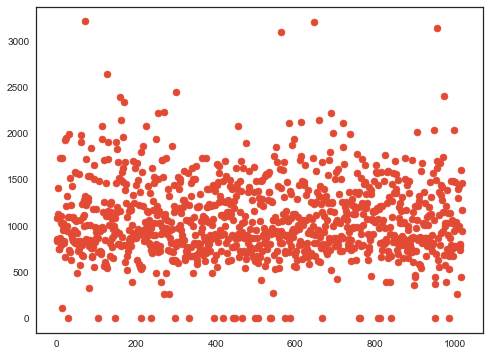

In [159]:
plt.scatter(range(0,len(train['TotalBsmtSF'])),train['TotalBsmtSF'])
np.median(train['TotalBsmtSF'])

3.0

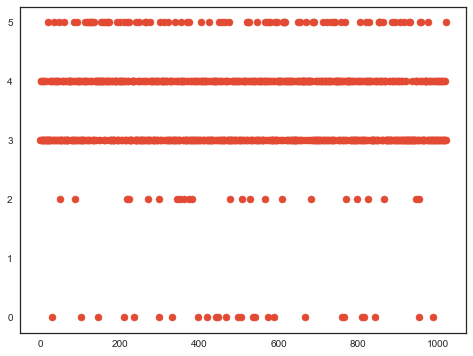

In [168]:
plt.scatter(range(0,len(train['BsmtQual_E'])),train['BsmtQual_E'])
np.median(train['BsmtQual_E'])

In [180]:
bsmtFill = list()
for i in range(0,len(train)):
    if train['BsmtQual_E'].iloc[i]==0:
        if trainM['TotalBsmtSF'].iloc[i]==0:
            bsmtFill.append(0)
        if trainM['TotalBsmtSF'].iloc[i]>0:
            bsmtFill.append(np.median(train['BsmtQual_E']))
    else:
        bsmtFill.append(train['BsmtQual_E'].iloc[i])

In [187]:
train['BsmtQual_E'] = bsmtFill

#### Next, we will look at Fireplace Quality

In [192]:
trainM['Fireplaces'][train['FireplaceQu_E']==0]

1407    0
770     0
979     0
967     0
372     0
141     0
1231    0
108     0
940     0
872     0
213     0
1432    0
505     0
254     0
1047    0
39      0
716     0
353     0
1200    0
1444    0
469     0
71      0
49      0
83      0
837     0
575     0
836     0
1376    0
155     0
137     0
       ..
574     0
1001    0
1287    0
739     0
456     0
1007    0
1003    0
441     0
1129    0
241     0
497     0
1013    0
978     0
1144    0
528     0
90      0
756     0
48      0
993     0
402     0
547     0
388     0
643     0
514     0
253     0
901     0
797     0
121     0
976     0
980     0
Name: Fireplaces, Length: 483, dtype: int64

In [199]:
fireplaceFill = list()
for i in range(0,len(train)):
    if train['FireplaceQu_E'].iloc[i]==0:
        if trainM['Fireplaces'].iloc[i]==0:
            fireplaceFill.append(0)
        if trainM['Fireplaces'].iloc[i]>0:
            fireplaceFill.append(np.median(train['FireplaceQu_E']))
    else:
        fireplaceFill.append(train['FireplaceQu_E'].iloc[i])
        
train['FireplaceQu_E'] = fireplaceFill

#### Finally, look at Garage Finish

In [198]:
trainM['GarageArea'][train['GarageFinish_E']==0]

1407    0
108     0
39      0
155     0
562     0
307     0
1038    0
495     0
125     0
1219    0
1137    0
1449    0
163     0
954     0
636     0
614     0
921     0
127     0
89      0
1325    0
431     0
1283    0
613     0
464     0
620     0
784     0
99      0
1257    0
520     0
710     0
649     0
942     0
393     0
386     0
1096    0
582     0
1179    0
140     0
1323    0
960     0
78      0
1123    0
434     0
1218    0
638     0
1131    0
165     0
826     0
970     0
750     0
1326    0
88      0
1143    0
210     0
441     0
241     0
528     0
48      0
976     0
Name: GarageArea, dtype: int64

In [202]:
garagefinishFill = list()
for i in range(0,len(train)):
    if train['GarageFinish_E'].iloc[i]==0:
        if trainM['GarageArea'].iloc[i]==0:
            garagefinishFill.append(0)
        if trainM['GarageArea'].iloc[i]>0:
            garagefinishFill.append(np.median(train['GarageFinish_E']))
    else:
        garagefinishFill.append(train['GarageFinish_E'].iloc[i])
        
train['GarageFinish_E'] = garagefinishFill

### Check the original quantities. We see no fills, except for fills in Fireplace Quality (lots of fills)

In [203]:
print("Missings or NAs in numeric variables:")
print(" ")
num_missing = train.isnull().sum()
print(num_missing)

print(" ")
print("Missings or NAs in categoric variables:")
print(" ")
for i in list(['ExterQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']):
    print(i + ": ")
    print((train[i]==0).sum())

Missings or NAs in numeric variables:
 
OverallQual       0
GrLivArea         0
TotalBsmtSF       0
GarageCars        0
FullBath          0
YearBuilt         0
SalePrice         0
ExterQual_E       0
BsmtQual_E        0
FireplaceQu_E     0
HeatingQC_E       0
GarageFinish_E    0
Blmngtn           0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NPkVill           0
NWAmes            0
NoRidge           0
NridgHt           0
OldTown           0
SWISU             0
Sawyer            0
SawyerW           0
Somerst           0
StoneBr           0
Timber            0
Veenker           0
dtype: int64
 
Missings or NAs in categoric variables:
 
ExterQual_E: 
0
BsmtQual_E: 
26
FireplaceQu_E: 
17
HeatingQC_E: 
0
GarageFinish_E: 
59


### OUTLIERS

Checking for any outliers in numeric variables with respect to Sale Price

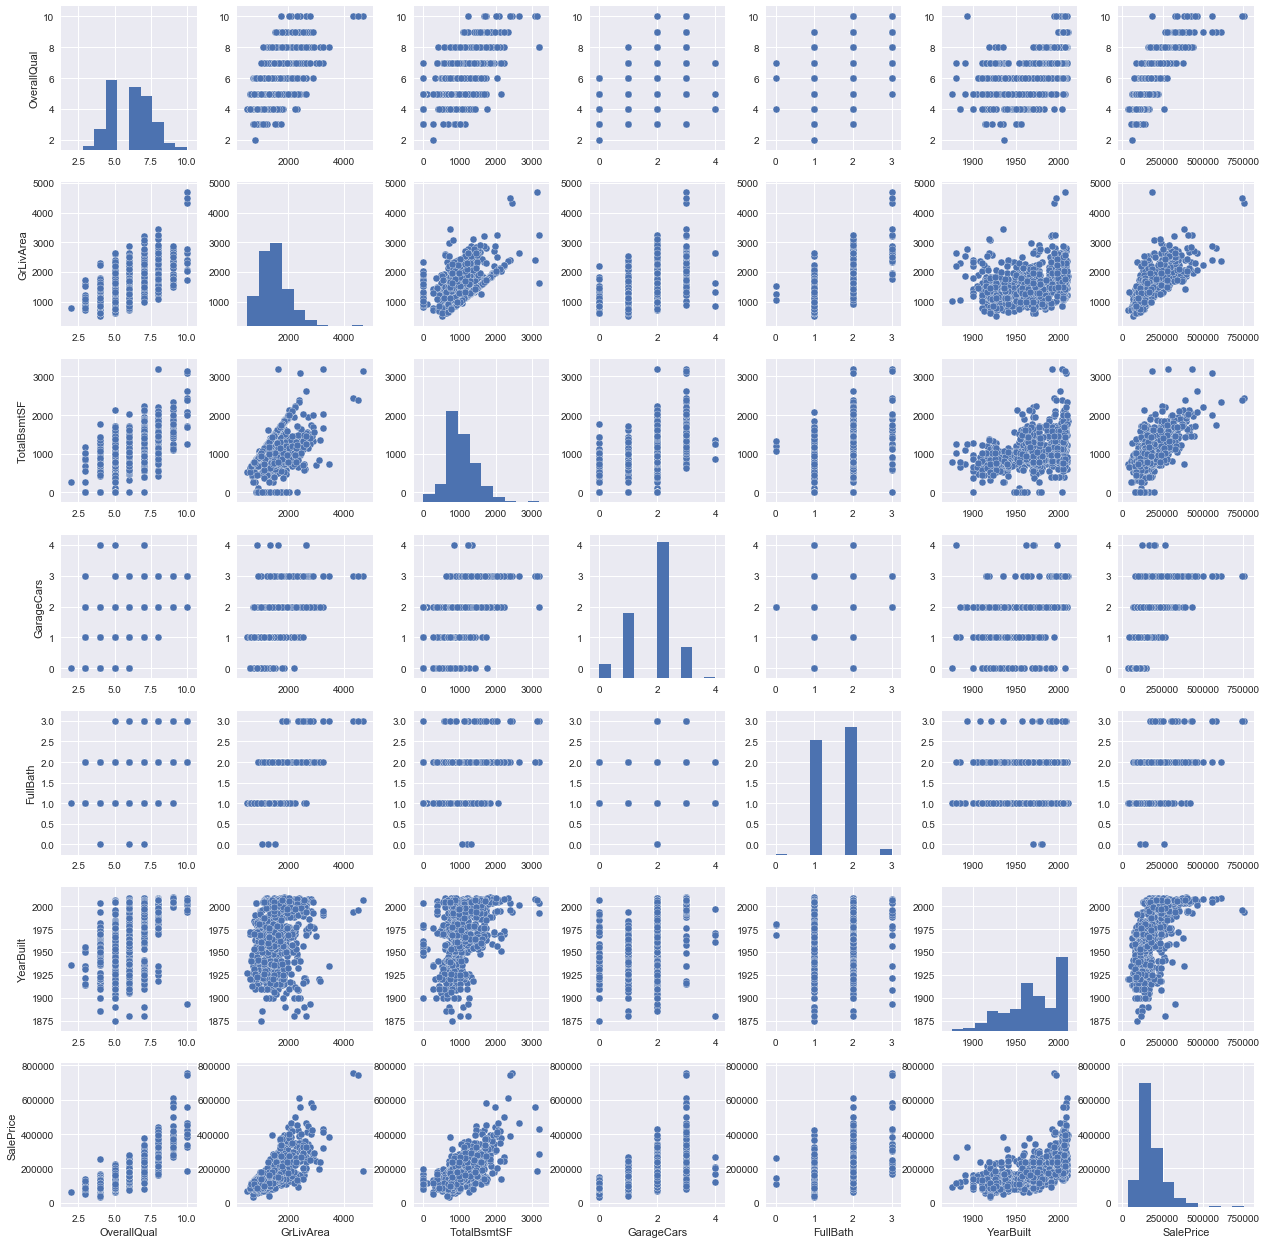

In [207]:
train.head()
#scatterplot
sns.set()
#numVars_sub = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt']
#sns.pairplot(train[numVars_sub], size = 2.5)
sns.pairplot(train[list(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt', 'SalePrice'])], size = 2.5)
plt.show();

We see an outlier in GrLivArea

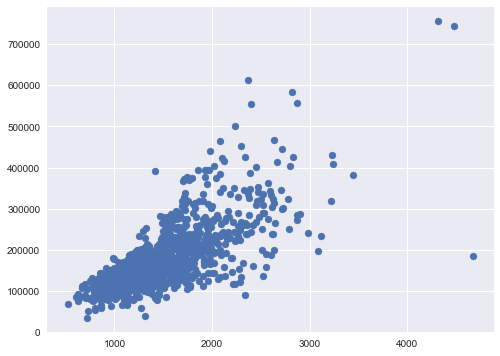

In [210]:
plt.scatter(train['GrLivArea'],train['SalePrice'])

In [217]:
train = train.drop(train.index[train['GrLivArea']>4500])

Removed that row

### NORMALIZATION OF SKEWED

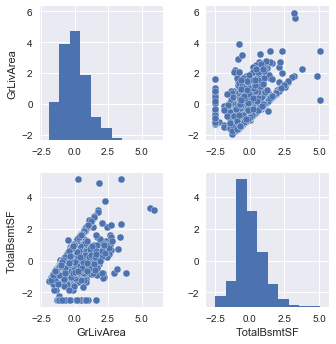

In [224]:
## Standardizing numeric features
numeric_features = train.loc[:,['GrLivArea', 'TotalBsmtSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

ax = sns.pairplot(numeric_features_standardized)

GrLivArea      1.014972
TotalBsmtSF    0.607165
dtype: float64
Index([u'GrLivArea'], dtype='object')
Index([u'GrLivArea'], dtype='object')


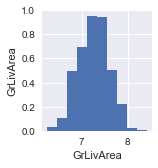

In [232]:
from scipy.stats import skew 
skewness = numeric_features_standardized.apply(lambda x: skew(x))
print(skewness.sort_values(ascending=False))

skewness = skewness[abs(skewness)>0.65]
print(skewness.index)

skew_features = train[skewness.index]
print(skew_features.columns)

#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)

ax = sns.pairplot(skew_features)

In [234]:
train['TotalBsmtSF'] = numeric_features_standardized['TotalBsmtSF']
train['GrLivArea'] = skew_features['GrLivArea']

In [239]:
train['SalePrice'] = np.log(train['SalePrice'])

Final prepared traininig data

In [237]:
train.columns.values

array(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'FullBath',
       'YearBuilt', 'SalePrice', 'ExterQual_E', 'BsmtQual_E',
       'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E', 'Blmngtn',
       'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], dtype=object)

In [236]:
train.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,SalePrice,ExterQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
1407,5,6.726233,-0.521111,0,1,1985,112000,3,3,3.0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1014,6,6.987490,0.068469,1,1,1948,119200,3,3,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
770,5,6.755769,-0.461916,2,1,1982,134900,3,4,4.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
665,8,7.568896,0.835632,2,2,2000,230500,4,4,4.0,5,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
979,5,7.022868,0.160812,2,1,1963,139000,3,3,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
